In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from neurolib.models.wc import WCModel
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

fs=16

plt.rcParams.update({'font.size': fs})

In [2]:
from neurolib.models.wc import WCModel
wc = WCModel()
wc.params.duration = 300.

wc.params.exc_ext = 2.
wc.params.inh_ext = 0.5
wc.run()

In [4]:
with open('boundary_bi.pickle', 'rb') as f:
    boundary_bi = pickle.load(f)
with open('boundary_osc.pickle', 'rb') as f:
    boundary_osc = pickle.load(f)

(0.0, 3.0)

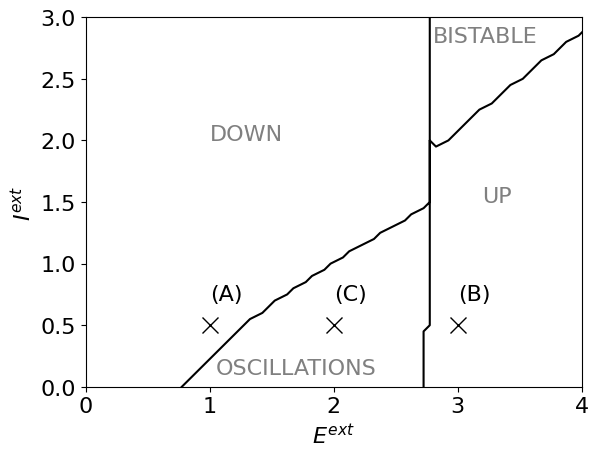

In [8]:
#comp_points = [[0., 0.5], [4., 0.5], [2., 0.5], [3., 2.3]]
comp_points = [[1., 0.5], [3., 0.5], [2., 0.5]]

pstring = ["(A)", "(B)", "(C)", "(D)"]

plt.plot(boundary_osc[0], boundary_osc[1], color='black')
plt.plot(boundary_bi[0], boundary_bi[1], color='black')
for pind in range(len(comp_points)):
    p=comp_points[pind]
    plt.plot(p[0], p[1], marker="x", markersize=12, color="black")
    plt.text(p[0], p[1]+0.2, pstring[pind], color="black", fontsize=fs)
plt.xlabel(r'$E^{ext}$')
plt.ylabel(r'$I^{ext}$')

plt.text(1., 2, "DOWN", color="grey", fontsize=fs)
plt.text(3.2, 1.5, "UP", color="grey", fontsize=fs)
plt.text(1.05, 0.1, "OSCILLATIONS", color="grey", fontsize=fs)
plt.text(2.8, 2.8, "BISTABLE", color="grey", fontsize=fs)

plt.xlim(0.,4.)
plt.ylim(0,3)

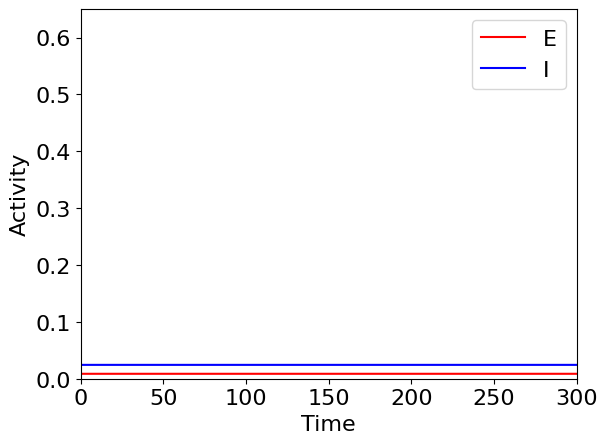

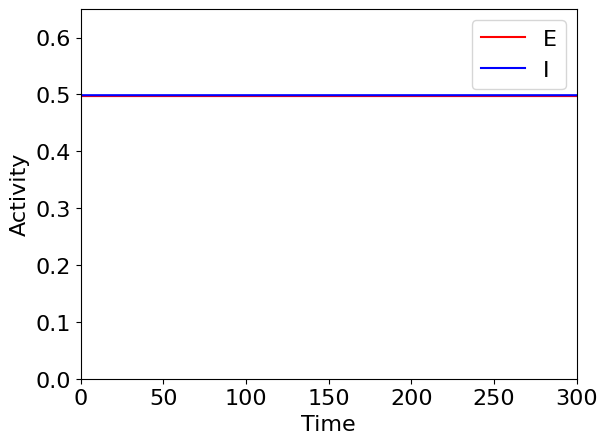

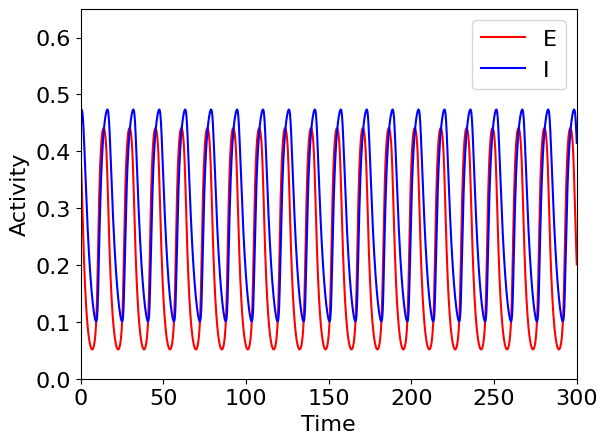

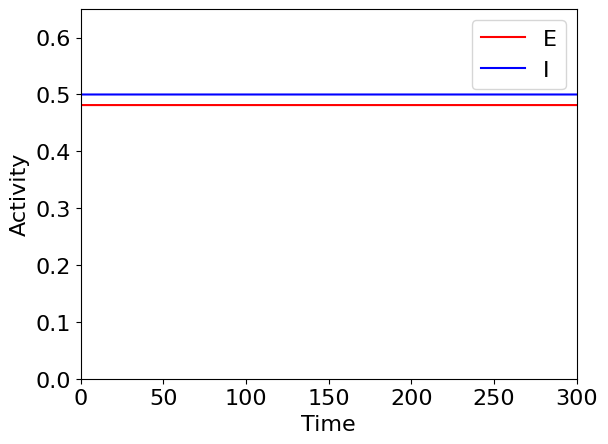

In [45]:
wc = WCModel()
wc.params.duration = 300.

for p in comp_points:
    wc.params.exc_ext = p[0]
    wc.params.inh_ext = p[1]
    wc.run()

    wc.params.exc_init = np.array([[wc.exc[0,-1]]])
    wc.params.inh_init = np.array([[wc.inh[0,-1]]])
    wc.run()

    plt.plot(wc.t, wc.exc[0,:], color="red", label="E")
    plt.plot(wc.t, wc.inh[0,:], color="blue", label="I")

    plt.xlim(0, 300)
    plt.ylim(0., 0.65)
    plt.legend(loc="upper right")

    plt.xlabel("Time")
    plt.ylabel("Activity")
    plt.show()


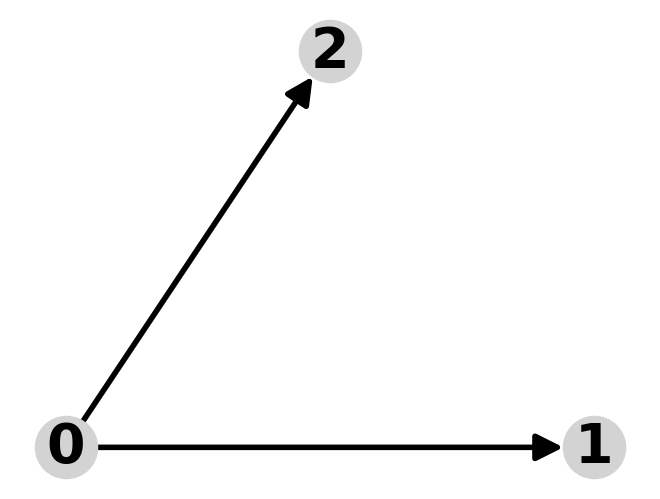

In [100]:
import networkx as nx

options = {
    'node_color': 'lightgray',
    'node_size': 2000,
    'width': 4,
    'arrowstyle': '-|>',
    'arrowsize': 40,
    'font_size' : 40,
    'font_weight' : 'bold',
    }

cmat = np.array( [[0., 0., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1

N = cmat.shape[0]
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

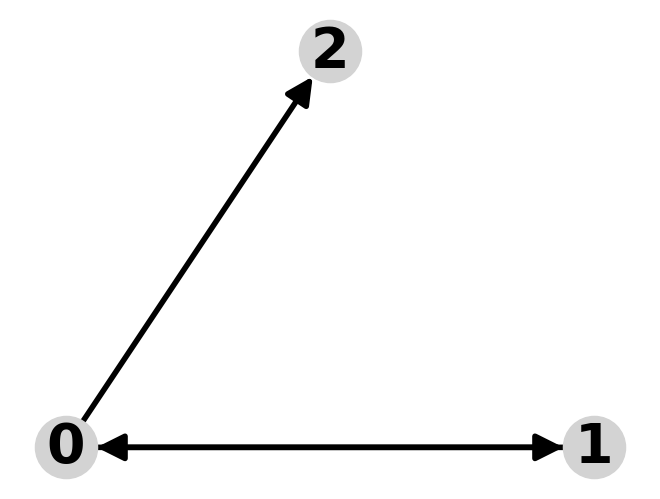

In [101]:
cmat = np.array( [[0., 1., 0.], [1., 0., 0.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()

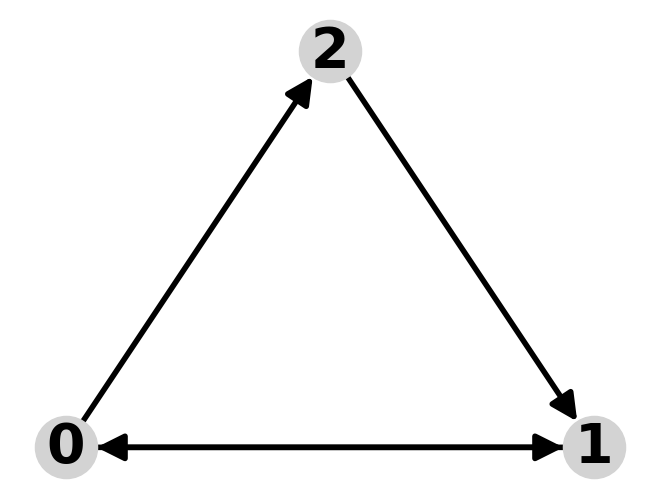

In [102]:

cmat = np.array( [[0., 1., 0.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()


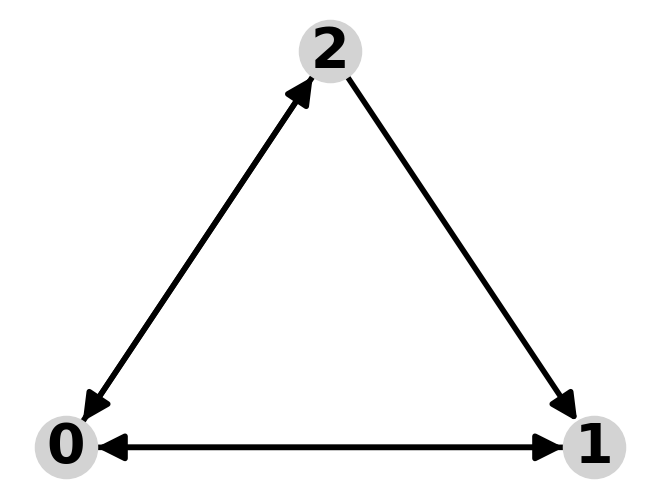

In [103]:

cmat = np.array( [[0., 1., 1.], [1., 0., 1.], [1., 0., 0.]] ) # diagonal elements are zero, connection strength is 1 from node 0 to node 1
G = nx.DiGraph() 
G.add_node(0,pos=(0,0))
G.add_node(1,pos=(2,0))
G.add_node(2,pos=(1,np.sqrt(3)))
pos=nx.get_node_attributes(G,'pos')
for n in range(cmat.shape[0]):
        for l in range(cmat.shape[1]):
            if cmat[n,l] != 0:
                G.add_edge(l,n)
nx.draw(G, pos, with_labels=True, arrows=True, **options)
plt.show()